In [1]:
import matplotlib.pyplot as plt
import pickle

In [9]:
with open('../results/gains.pickle', 'rb') as f:
    data = pickle.load(f)

In [14]:
gains = data['gain']
reward_change_points = data['reward_change_points']
cost_change_points = data['cost_change_points']
all_change_points = data['all_change_points']

In [37]:
def plot_gains(gain_dict, reward_change_points=(), cost_change_points=(), all_change_point_values=(),):
    fig, ax = plt.subplots(1,1, figsize=(15,8));
        
    
    
    ind_to_params = {
        # ind: (mark, color)
        0: ('^', 'k'),
        1: ('o','g'),
        2: ('s','r'),
        3: ('<','blue'),
        4: ('d','olive'),
        5: ('>', 'm'),
        6: ('x', 'c'),
        7: ('*', 'y'),
    }
    
    sorted_gain_dict = {
        k:v for k,v in sorted(gain_dict.items(), key=lambda x: x[1][-1], reverse=True)
    }
    
    
    max_vline=0
    
    for ind, (label, gain) in enumerate(sorted_gain_dict.items()):
        
        mark, color = ind_to_params[ind]
        ax.plot(gain, label=label, linestyle=':', 
                marker=mark, markevery=750, markersize=11, markeredgewidth=1.5,
                fillstyle='none', color=color,
                linewidth=3,
               )
        max_vline=max(max_vline, max(gain))
    
    plt.vlines(
        reward_change_points, ymin=0, ymax=max_vline, linestyle=':', alpha=0.4, label='Change points'
    )
    
    
    extraticks = all_change_point_values
    plt.xticks(extraticks, rotation=35, fontsize=22)
    plt.yticks(fontsize=22)
    
    ax.set_xlabel('Time step', fontsize=28)
    ax.set_ylabel('Cumulative gain', fontsize=28)
    
    plt.legend(prop={'size': 22});
    
    plt.savefig('nursery_gain.pdf', bbox_inches='tight')
    plt.show();

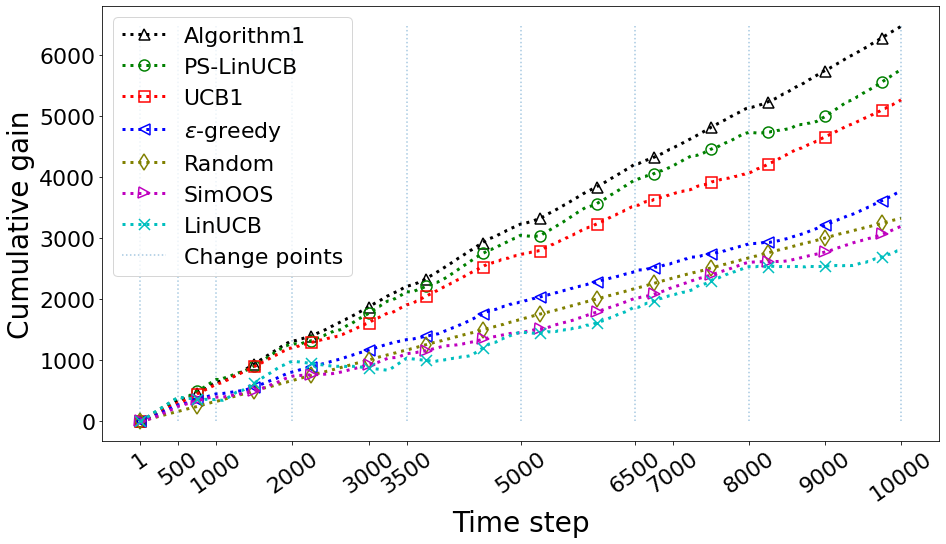

In [38]:
plot_gains(
    {k:v for k,v in gains.items() if k != 'Oracle'},
    reward_change_points=reward_change_points,
    cost_change_points=cost_change_points,
    all_change_point_values=all_change_points,
)
